KNN
Feature Extraction Method: GLCM
Features Taken with distance = 5, angle = 0

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/Machine Learning/GLCM"

/content/drive/MyDrive/Machine Learning/GLCM


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
import time

In [ ]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

# for k fold cross validation
x_new = list()
y_new = list()

In [ ]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [ ]:
dataset1 = pd.read_csv('GLCM_train.csv')
print(dataset1)

      Unnamed: 0    Energy      Corr   Diss_sim   Homogen    Contrast  \
0              0  0.014224  0.725731  15.456080  0.063373  383.715930   
1              0  0.015558  0.778272  12.804573  0.076365  263.964171   
2              0  0.015120  0.746263  13.894296  0.069790  310.096910   
3              0  0.016114  0.719193  13.510452  0.071717  292.011709   
4              0  0.013543  0.787991  14.764347  0.066498  351.571382   
...          ...       ...       ...        ...       ...         ...   
1435           0  0.033905  0.971425   3.316633  0.292426   22.962261   
1436           0  0.058558  0.959366   2.681734  0.485881   48.285804   
1437           0  0.047101  0.983943   2.665603  0.434930   30.869422   
1438           0  0.052825  0.987204   3.837789  0.358781   61.731910   
1439           0  0.052105  0.966701   3.046206  0.392387   38.874296   

       Energy2     Corr2  Diss_sim2  Homogen2  ...   Energy4  Corr4  \
0     0.012683  0.395795  22.695406  0.044695  ...  

In [ ]:
x = dataset1.iloc[:,11:16].values
print(len(x[0]))

5


In [ ]:
print(x)

[[1.24517214e-02 2.71204228e-01 2.48634103e+01 3.97342203e-02
  1.01318356e+03]
 [1.34048379e-02 4.41275423e-01 2.01172051e+01 5.08597913e-02
  6.57472590e+02]
 [1.32462640e-02 3.76921626e-01 2.15380256e+01 4.70296571e-02
  7.47128641e+02]
 ...
 [3.33351676e-02 8.35100932e-01 8.23856410e+00 2.50575371e-01
  3.21118462e+02]
 [3.48665720e-02 8.64707627e-01 1.21986667e+01 1.84690935e-01
  6.62054513e+02]
 [4.12908734e-02 8.18317591e-01 6.79512821e+00 2.48585891e-01
  2.13973590e+02]]


In [ ]:
print(x[0])

[1.24517214e-02 2.71204228e-01 2.48634103e+01 3.97342203e-02
 1.01318356e+03]


In [ ]:
print(len(x))

1440


In [ ]:
y = list()

In [ ]:
for i in range(0,6) :
    for j in range(0,240):
        y.append(i)


In [ ]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
X_train = x
y_train = y

In [ ]:
dataset1 = pd.read_csv('GLCM_test.csv')
print(dataset1)

     Unnamed: 0    Energy      Corr   Diss_sim   Homogen    Contrast  \
0             0  0.014085  0.748947  15.308317  0.063230  375.439874   
1             0  0.013354  0.812510  14.557965  0.068531  341.479372   
2             0  0.013476  0.759687  15.553065  0.063098  390.181206   
3             0  0.013039  0.771689  15.981709  0.062617  409.665628   
4             0  0.013783  0.757698  15.442638  0.064622  387.517764   
..          ...       ...       ...        ...       ...         ...   
355           0  0.062155  0.995837   1.575452  0.488198    5.920075   
356           0  0.067211  0.985235   1.432513  0.498722    4.875427   
357           0  0.055791  0.988033   2.337362  0.355444   10.801583   
358           0  0.046354  0.989063   2.493492  0.373817   19.243593   
359           0  0.055859  0.979090   2.404749  0.356955   14.151985   

      Energy2     Corr2  Diss_sim2  Homogen2  ...   Energy4  Corr4  Diss_sim4  \
0    0.012467  0.446429  22.532995  0.044155  ...  0.1

In [ ]:
x = dataset1.iloc[:,11:16].values
print(len(x[0]))

5


In [ ]:
print(x)
print(x[0])

[[1.22837374e-02 3.11786677e-01 2.48204615e+01 4.11062064e-02
  1.01926036e+03]
 [1.15904810e-02 5.32045089e-01 2.26312564e+01 4.52681077e-02
  8.34160744e+02]
 [1.16493814e-02 3.58520753e-01 2.51179487e+01 4.20494281e-02
  1.04075026e+03]
 ...
 [3.99379203e-02 9.27688946e-01 5.25128205e+00 1.95771812e-01
  6.49314872e+01]
 [3.36716754e-02 9.03525199e-01 6.17061538e+00 2.19845428e-01
  1.71253436e+02]
 [4.14036432e-02 8.88943344e-01 5.00961538e+00 2.13126563e-01
  7.41732051e+01]]
[1.22837374e-02 3.11786677e-01 2.48204615e+01 4.11062064e-02
 1.01926036e+03]


In [ ]:
print(len(x))

360


In [ ]:
y = list()

In [ ]:
for i in range(0,6) :
    for j in range(0,60):
        y.append(i)


In [ ]:
X_test = x
y_test = y

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1440
360
1440
360


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1440, 5) (1440,)
Test set: (360, 5) (360,)


In [ ]:
nsamples, nx = X_train.shape
X_train = X_train.reshape((nsamples,nx))

In [ ]:
print(X_train.shape)

(1440, 5)


In [ ]:
nsamples, nx = X_test.shape
X_test = X_test.reshape((nsamples,nx))

In [ ]:
print(X_test.shape)

(360, 5)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [ ]:
train_accuracy = list()
test_accuracy = list()
k_value = list()

In [ ]:

for k in range(1,101,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # print(metrics.accuracy_score(y_test, y_pred_test))
    # print(confusion_matrix(y_test, y_pred_test))
    # print(classification_report(y_test,y_pred_test))
    k_value.append(k)
    train_accuracy.append((metrics.accuracy_score(y_train, y_pred)))
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))


In [ ]:
print(train_accuracy)
print(test_accuracy)
print(k_value)

[1.0, 0.7590277777777777, 0.6888888888888889, 0.6375, 0.6180555555555556, 0.5993055555555555, 0.5916666666666667, 0.5680555555555555, 0.5722222222222222, 0.5604166666666667, 0.5583333333333333, 0.5458333333333333, 0.5381944444444444, 0.5409722222222222, 0.5291666666666667, 0.5270833333333333, 0.5222222222222223, 0.51875, 0.51875, 0.5166666666666667, 0.5118055555555555, 0.51875, 0.5236111111111111, 0.5131944444444444, 0.5159722222222223, 0.5138888888888888, 0.5097222222222222, 0.5055555555555555, 0.5076388888888889, 0.5048611111111111, 0.5020833333333333, 0.5034722222222222, 0.5020833333333333, 0.5, 0.5034722222222222, 0.50625, 0.5069444444444444, 0.5118055555555555, 0.5145833333333333, 0.5159722222222223, 0.51875, 0.5222222222222223, 0.5180555555555556, 0.5097222222222222, 0.5145833333333333, 0.5166666666666667, 0.5138888888888888, 0.5138888888888888, 0.5166666666666667, 0.5159722222222223]
[0.5527777777777778, 0.4777777777777778, 0.4361111111111111, 0.4638888888888889, 0.4583333333333

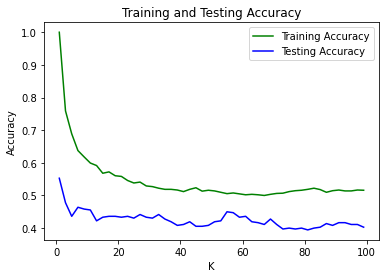

In [ ]:
plt.plot(k_value, train_accuracy, 'g', label='Training Accuracy')
plt.plot(k_value, test_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

0.5527777777777778
[[38  0 22  0  0  0]
 [ 0 44  0 10  0  6]
 [20  0 33  5  2  0]
 [ 9  7 14 19 10  1]
 [ 0  1  1 18 38  2]
 [ 0 29  0  4  0 27]]
              precision    recall  f1-score   support

           0       0.57      0.63      0.60        60
           1       0.54      0.73      0.62        60
           2       0.47      0.55      0.51        60
           3       0.34      0.32      0.33        60
           4       0.76      0.63      0.69        60
           5       0.75      0.45      0.56        60

    accuracy                           0.55       360
   macro avg       0.57      0.55      0.55       360
weighted avg       0.57      0.55      0.55       360

